In [1]:
import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,index,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,0,0,0,0,0,0,0,5,...,0,0,0,30,43,0,0,0,0,0
3,3,0,0,0,0,1,2,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train=train['label']

In [5]:
x_train=train.drop(['index','label'],axis=1)

In [6]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
np.sqrt(784)

28.0

In [8]:
x_train.shape

(60000, 784)

In [9]:
y_train.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [10]:
y_train.shape

(60000,)

In [11]:
x_train.isnull().any().sum()

0

In [13]:
x_train.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)

In [16]:
max_items=[max(x_train[i]) for i in x_train.columns]
max(max_items)

255

In [17]:
min_items=[min(x_train[i]) for i in x_train.columns]
min(min_items) #최대값 255,최소값 0

0

In [18]:
x_train=x_train.values.reshape(-1,28,28,1)
x_train=x_train.astype('float32')/255.

In [16]:
x_train

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [19]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,num_classes=10)
print(y_train[0])

Using TensorFlow backend.
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
model=Sequential()
model.add(Conv2D(64,3,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32,3,activation='relu',padding='valid'))
model.add(Conv2D(16,3,activation='relu',padding='valid'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 10, 16)        0         
__________

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2,batch_size=128)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 452s 9ms/step - loss: 0.7229 - acc: 0.7438 - val_loss: 0.4024 - val_acc: 0.8535
Epoch 2/10
48000/48000 [==============================] - 432s 9ms/step - loss: 0.4389 - acc: 0.8446 - val_loss: 0.3271 - val_acc: 0.8845
Epoch 3/10
48000/48000 [==============================] - 453s 9ms/step - loss: 0.3740 - acc: 0.8699 - val_loss: 0.2841 - val_acc: 0.8989
Epoch 4/10
48000/48000 [==============================] - 444s 9ms/step - loss: 0.3383 - acc: 0.8807 - val_loss: 0.2756 - val_acc: 0.9041
Epoch 5/10
48000/48000 [==============================] - 329s 7ms/step - loss: 0.3167 - acc: 0.8906 - val_loss: 0.2739 - val_acc: 0.9065
Epoch 6/10
48000/48000 [==============================] - 245s 5ms/step - loss: 0.2986 - acc: 0.8967 - val_loss: 0.2400 - val_acc: 0.9166
Epoch 7/10
48000/48000 [==============================] - 235s 5ms/step - loss: 0.2884 - acc: 0.9001 - val_loss: 0.2516 - 

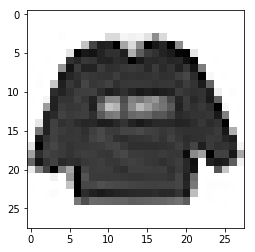

In [25]:
import matplotlib.pyplot as plt
img=np.array(x_train[0].reshape((28,28)))
plt.imshow(img,cmap='Greys')
plt.show()

In [28]:
test.head()
test=test.drop('index',axis=1)
test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
x_test=test.values.reshape(-1,28,28,1)/255.

In [30]:
x_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.03529412],
        [0.03137255],
        [0.        ],
        [0.        ],
        [0.13333333],
        [0.11372549],
        [0.02745098],
        [0.        ],
        [0.04313725],
        [0.09411765],
        [0.        ],
        [0.        ],
        [0.01176471],
        [0.01176471],
        [0.00392157],
        [0.        ],
        [0.00392157],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.01568627],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.17254902],
        [0.34509804],
        [0.38823529],
        [0.47843137],
        [0.48235294],
        [0.31372549],
        

In [32]:
y=model.predict_classes(x_test)

In [33]:
y

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [31]:
submission.head()

,index,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [35]:
submission['label']=y
submission.to_csv('fashion_submission.csv',index=False)

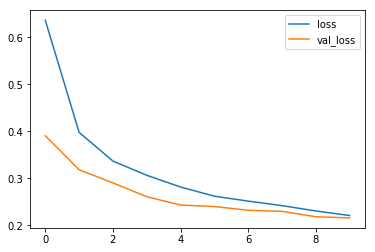

In [43]:
loss=history.history['loss']

val_loss=history.history['val_loss']
acc=history.history['acc']
val_acc=history.history['val_acc']
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.legend()
plt.show()

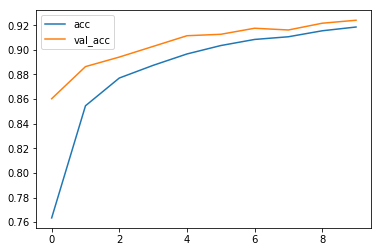

In [44]:
plt.plot(acc,label='acc')
plt.plot(val_acc,label='val_acc')
plt.legend()
plt.show()